Assume that 𝐼 is the original input image and 𝑂 is the transformed output image. 
Let 𝑎 and 𝑏 be the minimum and maximum pixel values allowed (for an 8-bit image that means 𝑎 = 0 and
𝑏 = 255). And let 𝑐 and 𝑑 be the minimum and maximum pixel values occurring in 𝐼. Then
the contrast stretched image 𝑂 is given by the function:
𝑂 = (𝐼 − 𝑐) ((𝑏 − 𝑎)/(𝑑 − 𝑐)) + 𝑎

### Question 1: Write a function that performs contrast stretching.
Read the given gray-scale image and apply your function to test whether it indeed improves the image quality.

### Question 2: Write a function that computes and plots the histogram of the given image.

### Question 3: Write a function that computes the two gradient images 𝜕𝐼/𝜕𝑥 ≈ 𝐼 ∗ 𝑆𝑥 and 𝜕𝐼/𝜕𝑦 ≈ 𝐼 ∗ 𝑆𝑦 from the given image.



 unique Pixels for the image - histogram  [ 50  75 100 125 150 175]


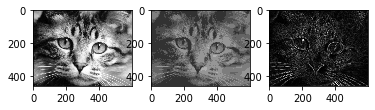

In [3]:
import cv2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
I = cv2.imread("cat.png", 0)
I.shape
#Machine limits for integer types.
# using below 2 lines to get vmin and vmax
#pixel_type = type(img[0][0][0])
#pixel_info = np.iinfo(pixel_type)
#a,b = pixel_info.min, pixel_info.max
c = np.min(I)
d = np.max(I)

# Question1 Contrast Stretching
O = (I - c) * (255/(d - c)) + 0
#plt.imshow(I, cmap='gray', vmin=0, vmax=255)
#plt.imshow(O, cmap="gray", vmin=0, vmax=255)
#cv2.imwrite("O1.png",O)
#plt.tight_layout()
#plt.show()

# Question2 Histogram
from bisect import bisect 
breakpoints = list(range(0,255, 25))
data = list(I[:,:].flatten())

def bin_data(val, breakpoints=[60, 70, 80, 90], bins=[4,3,2,1]):
        i = bisect(breakpoints, val)
        return bins[i]
    
binned = [bin_data(i,breakpoints, breakpoints) for i in data]
    
hist = np.zeros(len(breakpoints))

for i in binned:
    idx = breakpoints.index(i)
    hist[idx] += 1

img_quant = np.array(binned).reshape(I.shape)
print(" unique Pixels for the image - histogram ",np.unique(img_quant))
plt.imshow(img_quant, cmap="gray", vmin=0, vmax=255)

#Question3 image edges
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

sbl_x = cv2.filter2D(I, -1, sobel_x)
sbl_y = cv2.filter2D(I, -1, sobel_y)

#plt.subplot(1,2,1)
plt.imshow(sbl_x, cmap='gray', vmin=0, vmax=255)
plt.imshow(sbl_y, cmap='gray', vmin=0, vmax=255)

#compare with Sobel(), considering absolute value and addedweight.
#plt.subplot(1,2,2)
sobelx=cv2.Sobel(I,cv2.CV_64F, 1, 0, ksize=3)
sobelx=cv2.convertScaleAbs(sobelx)
sobely=cv2.Sobel(I,cv2.CV_64F, 0, 1, ksize=3)
sobely=cv2.convertScaleAbs(sobely)
sobelxy=cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
plt.imshow(sobelxy,'gray')

plt.subplot(1,3,1)
plt.imshow(O, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(img_quant, cmap="gray", vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(sobelxy,'gray')
#plt.subplot(1,2,1)


### Question 4 (2.5 marks): Write a function that implements the above technique. Apply it to the given image using, for example, 𝜎 = 1.0 pixels and 𝑎 = 1.25. The differences between 𝐼 and 𝑂 are subtle but the latter should be visibly sharper.

Notice that this technique may produce output pixel values outside the range [0,255]. Thus,
make sure you use the right data types for the computations. Also, you can apply contrast
stretching (which you implemented in answer to Question 1) to force the contrast in 𝐼 and 𝑂
to be in the same range [0,255], so you can properly compare the two images visually

Algorithm:
1. Takes the input (cat.png) as I
2. Image 𝐼 and convolves it with a Gaussian kernel 𝐺 with standard deviation or scale 𝜎 = 1.0,resulting in a slightly   blurred image 𝐿. 
3. Next, the blurred image 𝐿 is subtracted from the input image 𝐼, resulting in image 𝐻, in which the high frequencies are enhanced. 
4. Then, each pixel in 𝐻 is multiplied by a constant factor 𝑎, and the resulting image is added pixel-wise to the input image 𝐼, resulting in output image 𝑂.
Next, I increased the contrast using contrast stretching method, which gave relatively better image.
After these steps I have increased the sharpness of the edges for more definition and texture using the steps in question 3 (kernel_sharpening) which is edge detection
source : https://en.wikipedia.org/wiki/Unsharp_masking

In [1]:
import cv2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
I = cv2.imread("cat.png",0)
L = cv2.GaussianBlur(I,(3,3),1,1)
H = cv2.subtract(I,L)
O=(1.25*H)+I
O = (O - np.min(O)) * (255/(np.max(O) - np.min(O))) + 0
O=O/np.max(O)
edge_detection = np.array([[0,-1,0], 
                              [-1, 5,-1],
                              [0,-1,0]])
out = cv2.filter2D(O, -1, edge_detection)
O = cv2.convertScaleAbs(O, alpha=(255.0))
out = cv2.convertScaleAbs(out, alpha=(255.0))
cv2.imshow("input",I)
cv2.imshow("Kernel_sharpening",out)
cv2.imshow("Unsharp_Gussian",O)
cv2.imwrite('Kernel_sharpening.png', out)
cv2.imwrite('Unsharp_Gussian.png', O)
#cv2.imshow("L",L)
#cv2.imshow("H",H)
cv2.waitKey(0)
cv2.destroyAllWindows()
#plt.imshow(O,cmap='gray', vmin=0, vmax=255)

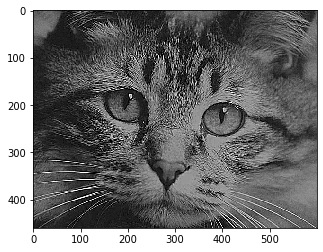

In [2]:
# trying Gaussian filtering , sharpening
blur = cv2.GaussianBlur(I,(3,3),1,1)  # removed some noise by blurring the image...
plt.imshow(blur,cmap='gray', vmin=0, vmax=255)

sharpening = np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])
dst2 = cv2.filter2D(I, -1, sharpening)
cv2.imshow("Image", I)
#cv2.imshow("Detail_Enhance", dst)
cv2.imshow("Kernel", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(dst2,cmap='gray', vmin=0, vmax=255)

